In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

df = pd.read_csv('power_ratio.csv')
df.head()

,year,county,residential,service industry,public department,industry,other
0,2021,新北市,41.88,26.38,2.85,28.77,0.12
1,2021,台北市,35.09,52.79,8.25,3.79,0.08
2,2021,桃園市,17.54,13.77,1.64,66.87,0.18
3,2021,台中市,18.70,15.44,1.94,63.44,0.48
4,2021,台南市,13.69,9.14,1.51,74.29,1.37


In [2]:
df['year'].value_counts()

2021    22
2020    22
2019    22
2018    22
Name: year, dtype: int64

In [3]:
df.columns

Index(['year', 'county', 'residential', 'service industry',
       'public department', 'industry', 'other'],
      dtype='object')

In [4]:
county_num = df['county'].nunique()
year_df = df.groupby('year')
ratio_2021 = year_df.get_group(2021)
ratio_2021[['residential', 'service industry', 'public department', 'industry', 'other']].agg(['sum']) / county_num

,residential,service industry,public department,industry,other
sum,28.97,23.146818,4.708182,40.797727,2.377273


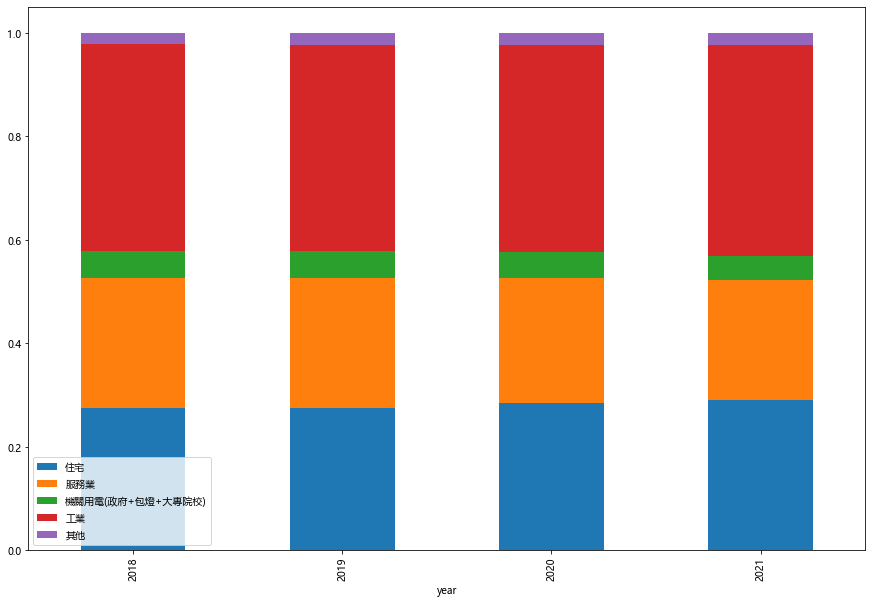

In [5]:
year_df = df.groupby('year')
years = year_df.groups.keys()

result_df = pd.DataFrame()

for year in years:
    ratio_df = year_df.get_group(year)
    cur_df = ratio_df[['residential', 'service industry', 'public department', 'industry', 'other']].agg(['sum']) / (county_num*100) 
    cur_df = cur_df.reset_index(drop = True)
    cur_df['year'] = year
    result_df = pd.concat([result_df, cur_df])

result_df['year'] = result_df['year'].astype(str)

n_result_df = result_df.copy()
n_result_df.rename(columns = {
    'residential': '住宅', 
    'service industry': '服務業', 
    'public department': '機關用電(政府+包燈+大專院校)', 
    'industry': '工業', 
    'other': '其他'
}, inplace=True)
n_result_df.plot(x='year',  figsize=(15,10), kind='bar', stacked=True)

In [6]:
result_df

,residential,service industry,public department,industry,other,year
0,0.274709,0.250455,0.052959,0.399318,0.022559,2018
0,0.275505,0.250564,0.051850,0.398745,0.023336,2019
0,0.283695,0.242445,0.050250,0.399291,0.024323,2020
0,0.289700,0.231468,0.047082,0.407977,0.023773,2021


In [7]:
result_df[['residential', 'service industry', 'public department', 'industry', 'other']].describe()

,residential,service industry,public department,industry,other
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.280902,0.243733,0.050535,0.401333,0.023498
std,0.007134,0.009017,0.002557,0.004437,0.000745
min,0.274709,0.231468,0.047082,0.398745,0.022559
25%,0.275306,0.239701,0.049458,0.399155,0.023142
50%,0.279600,0.246450,0.051050,0.399305,0.023555
75%,0.285197,0.250482,0.052127,0.401483,0.023910
max,0.289700,0.250564,0.052959,0.407977,0.024323
